__Keras__: High-level API that allows defining different neural network architectures and training them using various of gradient-based optimizers. In the backend, Keras uses a low-level computational framework that is implemented in C, C++, and FORTRAN. Several such low-level frameworks are available open source. Keras supports the following three:
* TensorFlow, which was developed by Google and is the default backend of Keras
* CNTK, an opensource framework from Microsoft
* Theano, which was originally developed at University of Montreal, Canada

Examples in this book use TensorFlow as the backend.

In [2]:
# from __future__ import print_function
import os
import sys
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sb
import datetime

In [3]:
df = pd.read_csv('https://github.com/sri-spirited/Practical-Time-Series-Analysis-Python/blob/master/Data%20Files/PRSA_data_2010.1.1-2014.12.31.csv?raw=true')

In [4]:
print('Shape of the dataframe:', df.shape)

Shape of the dataframe: (43824, 13)


In [5]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [6]:
df.dropna(subset=['pm2.5'], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True) # When drop=True, a series is returned 

In [7]:
df['datetime'] = df[['year', 'month', 'day', 'hour']].apply(lambda row: datetime.datetime(year=row['year'], month=row['month'], day=row['day'], 
                                                                                          hour=row['hour']), axis=1)
df.sort_values('datetime', ascending=True, inplace=True)

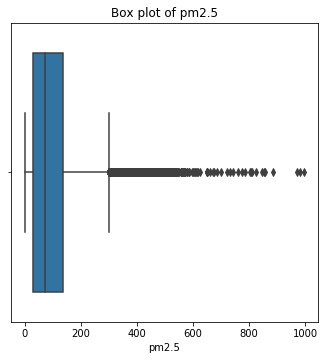

In [9]:
plt.figure(figsize=(5.5, 5.5))
g = sb.boxplot(df['pm2.5'])
g.set_title('Box plot of pm2.5');

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


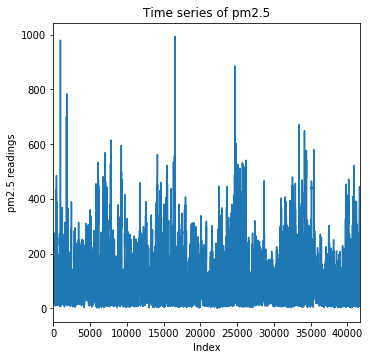

In [11]:
plt.figure(figsize=(5.5, 5.5))
g = sb.tsplot(df['pm2.5'])
g.set_title('Time series of pm2.5')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings'); 

C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
C:\Users\sridevi.tolety\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


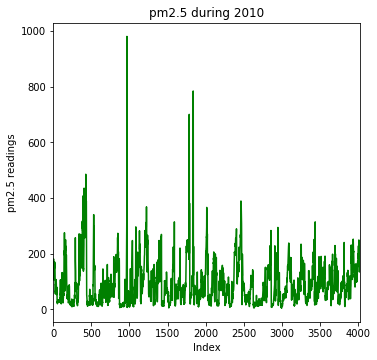

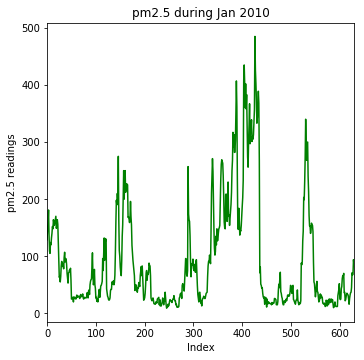

In [12]:
plt.figure(figsize=(5.5, 5.5))
g = sb.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=6,day=30)], color='g')
g.set_title('pm2.5 during 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings')
  
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df['pm2.5'].loc[df['datetime']<=datetime.datetime(year=2010,month=1,day=31)], color='g')
g.set_title('pm2.5 during Jan 2010')
g.set_xlabel('Index')
g.set_ylabel('pm2.5 readings');

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df['scaled_pm2.5'] = scaler.fit_transform(np.array(df['pm2.5']).reshape(-1, 1))

In [14]:
split_date = datetime.datetime(year=2014, month=1, day=1, hour=0)
df_train = df.loc[df['datetime']<split_date]
df_val = df.loc[df['datetime']>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of validation:', df_val.shape)

Shape of train: (33096, 15)
Shape of validation: (8661, 15)


In [15]:
df_train.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
0,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00,0.129779
1,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00,0.148893
2,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00,0.159960
3,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00,0.182093
4,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00,0.138833


In [16]:
df_val.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime,scaled_pm2.5
33096,35065,2014,1,1,0,24.0,-20,7.0,1014.0,NW,143.48,0,0,2014-01-01 00:00:00,0.024145
33097,35066,2014,1,1,1,53.0,-20,7.0,1013.0,NW,147.50,0,0,2014-01-01 01:00:00,0.053320
33098,35067,2014,1,1,2,65.0,-20,6.0,1013.0,NW,151.52,0,0,2014-01-01 02:00:00,0.065392
33099,35068,2014,1,1,3,70.0,-20,6.0,1013.0,NW,153.31,0,0,2014-01-01 03:00:00,0.070423
33100,35069,2014,1,1,4,79.0,-18,3.0,1012.0,cv,0.89,0,0,2014-01-01 04:00:00,0.079477


In [17]:
df_val.reset_index(drop=True, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


Text(0,0.5,'Scaled pm2.5 readings')

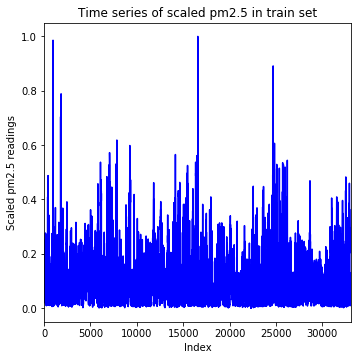

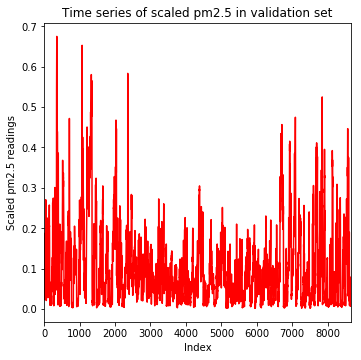

In [16]:
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_train['scaled_pm2.5'], color='b')
g.set_title('Time series of scaled pm2.5 in train set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')
  
plt.figure(figsize=(5.5, 5.5))
g = sns.tsplot(df_val['scaled_pm2.5'], color='r')
g.set_title('Time series of scaled pm2.5 in validation set')
g.set_xlabel('Index')
g.set_ylabel('Scaled pm2.5 readings')

In [34]:
def makeXy(ts, nb_timesteps):
    
    X = []
    y = []
    for i in range(nb_timesteps, ts.shape[0]):#From 7 to len(array)
        X.append(list(ts.loc[i-nb_timesteps:i-1]))
        y.append(ts.loc[i])
    X, y = np.array(X), np.array(y)
    return X, y

In [38]:
X_train, y_train = makeXy(df_train['scaled_pm2.5'], 7)
print('Shape of train arrays:', X_train.shape, y_train.shape)

Shape of train arrays: (33089, 7) (33089,)


In [41]:
X_val, y_val = makeXy(df_val['scaled_pm2.5'], 7)
print('Shape of validation arrays:', X_val.shape, y_val.shape)

Shape of validation arrays: (8654, 7) (8654,)


In [42]:
from keras.layers import Dense, Input, Dropout
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


In [47]:
input_layer = Input(shape=(7,), dtype='float32')

In [48]:
dense1 = Dense(32, activation='tanh')(input_layer)
dense2 = Dense(16, activation='tanh')(dense1)
dense3 = Dense(16, activation='tanh')(dense2)

In [49]:
dropout_layer = Dropout(0.2)(dense3)

In [50]:
output_layer = Dense(1, activation='linear')(dropout_layer)

In [51]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 7)                 0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                256       
_________________________________________________________________
dense_5 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_6 (Dense)              (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 17        
Total params: 1,073
Trainable params: 1,073
Non-trainable params: 0
_________________________________________________________________


In [53]:
# save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
# save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
#                             save_best_only=True, save_weights_only=False, mode='min',
#                             period=1)
                            
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, #callbacks=[save_best], 
             validation_data=(X_val, y_val),
             shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 5s 142us/step - loss: 0.0188 - val_loss: 0.0168
Epoch 2/20
33089/33089 [==============================] - 4s 125us/step - loss: 0.0165 - val_loss: 0.0121
Epoch 3/20
33089/33089 [==============================] - 4s 123us/step - loss: 0.0162 - val_loss: 0.0140
Epoch 4/20
33089/33089 [==============================] - 4s 118us/step - loss: 0.0161 - val_loss: 0.0119
Epoch 5/20
33089/33089 [==============================] - 4s 119us/step - loss: 0.0162 - val_loss: 0.0120
Epoch 6/20
33089/33089 [==============================] - 4s 119us/step - loss: 0.0162 - val_loss: 0.0121
Epoch 7/20
33089/33089 [==============================] - 4s 121us/step - loss: 0.0161 - val_loss: 0.0121
Epoch 8/20
33089/33089 [==============================] - 4s 116us/step - loss: 0.0161 - val_loss: 0.0147
Epoch 9/20
33089/33089 [==============================]

In [57]:
# best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.03-0.0119.hdf5'))
preds = ts_model.predict(X_val)
# preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [58]:
from sklearn.metrics import mean_absolute_error

In [59]:
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 12.1481


Text(0.5, 0, 'Index')

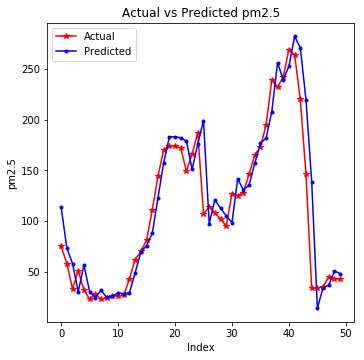

In [60]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')
# plt.savefig('plots/Section 5/_05_10.png', format='png', dpi=300)

# Time series forecasting by LSTM

In [61]:
from keras.layers.recurrent import LSTM

In [62]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [63]:
input_layer = Input(shape=(7,1), dtype='float32')

In [64]:
lstm_layer1 = LSTM(64, input_shape=(7,1), return_sequences=True)(input_layer)
lstm_layer2 = LSTM(32, input_shape=(7,64), return_sequences=False)(lstm_layer1)

In [65]:
dropout_layer = Dropout(0.2)(lstm_layer2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [66]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 7, 64)             16896     
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 33        
Total params: 29,345
Trainable params: 29,345
Non-trainable params: 0
_________________________________________________________________


In [38]:
# save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
# save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
#                             save_best_only=True, save_weights_only=False, mode='min',
#                             period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 928s 28ms/step - loss: 0.0196 - val_loss: 0.0117
Epoch 2/20
33089/33089 [==============================] - 82s 2ms/step - loss: 0.0150 - val_loss: 0.0129
Epoch 3/20
33089/33089 [==============================] - 99s 3ms/step - loss: 0.0150 - val_loss: 0.0127
Epoch 4/20
33089/33089 [==============================] - 106s 3ms/step - loss: 0.0150 - val_loss: 0.0125
Epoch 5/20
33089/33089 [==============================] - 90s 3ms/step - loss: 0.0148 - val_loss: 0.0129
Epoch 6/20
33089/33089 [==============================] - 97s 3ms/step - loss: 0.0149 - val_loss: 0.0122
Epoch 7/20
33089/33089 [==============================] - 103s 3ms/step - loss: 0.0149 - val_loss: 0.0134
Epoch 8/20
33089/33089 [==============================] - 99s 3ms/step - loss: 0.0148 - val_loss: 0.0120
Epoch 9/20
33089/33089 [==============================] - 102s 3ms/step - loss: 0.0148 - val_loss: 0.0119
E

In [39]:
# best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.01-0.0117.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [40]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.6184


Text(0.5,0,'Index')

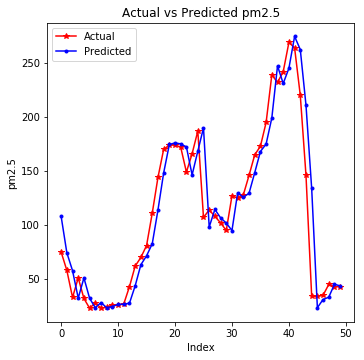

In [41]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

# Time series forecasting by GRU


In [43]:
from keras.layers.recurrent import GRU

In [44]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape) 

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [45]:
input_layer = Input(shape=(7,1), dtype='float32')

In [46]:
gru_layer1 = GRU(64, input_shape=(7,1), return_sequences=True)(input_layer)
gru_layer2 = GRU(32, input_shape=(7,64), return_sequences=False)(gru_layer1)

In [47]:
dropout_layer = Dropout(0.2)(gru_layer2)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [48]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
gru_1 (GRU)                  (None, 7, 64)             12672     
_________________________________________________________________
gru_2 (GRU)                  (None, 32)                9312      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 22,017
Trainable params: 22,017
Non-trainable params: 0
_________________________________________________________________


In [49]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 141s 4ms/step - loss: 0.0169 - val_loss: 0.0128
Epoch 2/20
33089/33089 [==============================] - 130s 4ms/step - loss: 0.0152 - val_loss: 0.0141
Epoch 3/20
33089/33089 [==============================] - 122s 4ms/step - loss: 0.0151 - val_loss: 0.0145
Epoch 4/20
33089/33089 [==============================] - 129s 4ms/step - loss: 0.0150 - val_loss: 0.0120
Epoch 5/20
33089/33089 [==============================] - 128s 4ms/step - loss: 0.0150 - val_loss: 0.0120
Epoch 6/20
33089/33089 [==============================] - 128s 4ms/step - loss: 0.0149 - val_loss: 0.0123
Epoch 7/20
33089/33089 [==============================] - 120s 4ms/step - loss: 0.0149 - val_loss: 0.0128
Epoch 8/20
33089/33089 [==============================] - 118s 4ms/step - loss: 0.0148 - val_loss: 0.0124ETA: 
Epoch 9/20
33089/33089 [==============================] - 123s 4ms/step - loss: 0.0148 - val_loss:

In [50]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.05-0.0120.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [51]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 11.9145


Text(0.5,0,'Index')

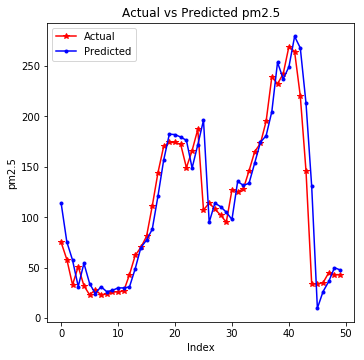

In [52]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')

# Time series forecasting by 1D Convolution

In [54]:
from keras.layers import Flatten
from keras.layers.convolutional import ZeroPadding1D
from keras.layers.convolutional import Conv1D
from keras.layers.pooling import AveragePooling1D

In [57]:
X_train, X_val = X_train.reshape((X_train.shape[0], X_train.shape[1], 1)), X_val.reshape((X_val.shape[0], X_val.shape[1], 1)) 
print('Shape of arrays after reshaping:', X_train.shape, X_val.shape)

Shape of arrays after reshaping: (33089, 7, 1) (8654, 7, 1)


In [58]:
input_layer = Input(shape=(7,1), dtype='float32')

In [59]:
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

In [60]:
conv1D_layer1 = Conv1D(64, 3, strides=1, use_bias=True)(zeropadding_layer)
conv1D_layer2 = Conv1D(32, 3, strides=1, use_bias=True)(conv1D_layer1)

In [63]:
avgpooling_layer = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

In [64]:
flatten_layer = Flatten()(avgpooling_layer)

In [65]:
dense_layer1 = Dense(32)(avgpooling_layer)
dense_layer2 = Dense(16)(dense_layer1)

In [66]:
dropout_layer = Dropout(0.2)(flatten_layer)
output_layer = Dense(1, activation='linear')(dropout_layer)

In [67]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 7, 1)              0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 9, 1)              0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 7, 64)             256       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 5, 32)             6176      
_________________________________________________________________
average_pooling1d_1 (Average (None, 3, 32)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 96)                0         
__________

In [69]:
save_weights_at = os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
                            save_best_only=True, save_weights_only=False, mode='min',
                            period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=16, epochs=20,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 33089 samples, validate on 8654 samples
Epoch 1/20
33089/33089 [==============================] - 8s 231us/step - loss: 0.0170 - val_loss: 0.0135
Epoch 2/20
33089/33089 [==============================] - 8s 239us/step - loss: 0.0166 - val_loss: 0.0133
Epoch 3/20
33089/33089 [==============================] - 8s 228us/step - loss: 0.0166 - val_loss: 0.0157
Epoch 4/20
33089/33089 [==============================] - 8s 233us/step - loss: 0.0164 - val_loss: 0.0138
Epoch 5/20
33089/33089 [==============================] - 8s 256us/step - loss: 0.0163 - val_loss: 0.0135
Epoch 6/20
33089/33089 [==============================] - 9s 273us/step - loss: 0.0162 - val_loss: 0.0131
Epoch 7/20
33089/33089 [==============================] - 9s 262us/step - loss: 0.0161 - val_loss: 0.0139
Epoch 8/20
33089/33089 [==============================] - 8s 251us/step - loss: 0.0161 - val_loss: 0.0130
Epoch 9/20
33089/33089 [==============================] - 9s 258us/step - loss: 0.0160 - val_loss: 0.01

In [70]:
best_model = load_model(os.path.join('datasets', 'PRSA_data_2010.1.1-2014.12.31.02-0.0133.hdf5'))
preds = best_model.predict(X_val)
pred_pm25 = scaler.inverse_transform(preds)
pred_pm25 = np.squeeze(pred_pm25)

In [71]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(df_val['pm2.5'].loc[7:], pred_pm25)
print('MAE for the validation set:', round(mae, 4))

MAE for the validation set: 13.2368


In [ ]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(range(50), df_val['pm2.5'].loc[7:56], linestyle='-', marker='*', color='r')
plt.plot(range(50), pred_pm25[:50], linestyle='-', marker='.', color='b')
plt.legend(['Actual','Predicted'], loc=2)
plt.title('Actual vs Predicted pm2.5')
plt.ylabel('pm2.5')
plt.xlabel('Index')